<a href="https://colab.research.google.com/github/mulkihakim/PCVK_Ganjil_2024/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRAKTIKUM**

2. Akses folder images pada Google Drive Anda dengan kode berikut:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


3. Melakukan transformasi linier brightness dengan memasukkan nilai konstanta tertentu dan
menghasilkan warna. Seperti yang telah dibahas pada ulasan teori, formula untuk melakukan
**TRANSFORMASI LINEAR BRIGHTNESS**

adalah sebagai berikut:
𝑔(𝑥, 𝑦) = 𝑓(𝑥, 𝑦) + 𝑏
dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, dan b adalah
nilai brightness.


----------------------------------
 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


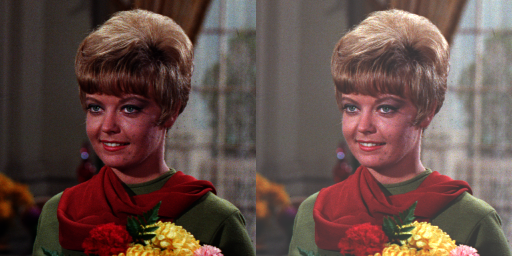

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('----------------------------------')
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Kuliah polinema/sem 5/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**TUGAS PRAKTIKUM**

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

----------------------------------
 Mengubah citra ke invers 
----------------------------------


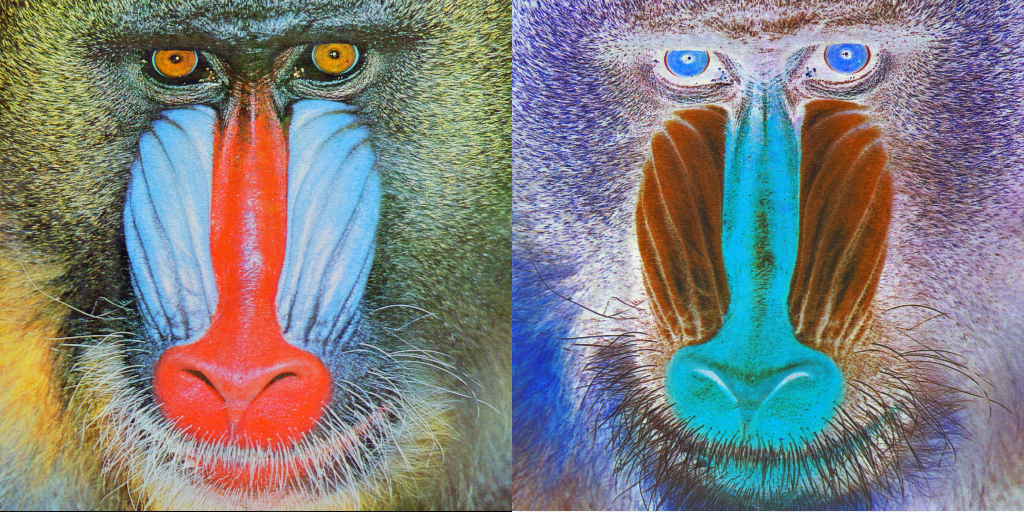

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('----------------------------------')
print(' Mengubah citra ke invers ')
print('----------------------------------')

original = cv.imread('/content/drive/MyDrive/Kuliah polinema/sem 5/PCVK/Images/mandrill.tiff')
inverse_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      inverse_image[y,x,c] = 255 - original[y,x,c]

# Atau cara yang lebih sederhana tanpa perulangan
# inverse_image = cv.bitwise_not(original)

final_frame = cv.hconcat((original, inverse_image))
cv2_imshow(final_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

----------------------------------
 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------
Masukkan tingkat kecerahan [-255 -255]: 50
Masukkan tingkat kontras [1.0 - 3.0]: 2


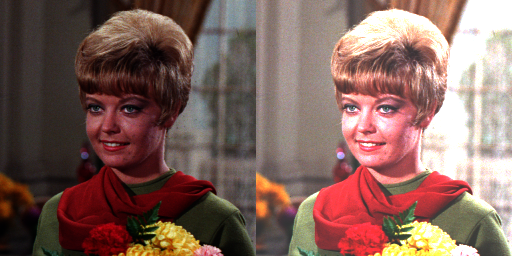

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('----------------------------------')
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------')

try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 -255]: '))
  contrast = int(input('Masukkan tingkat kontras [1.0 - 3.0]: '))
  if contrast < 1.0 or contrast > 3.0:
    raise ValueError
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Kuliah polinema/sem 5/PCVK/Images/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#contrast_image = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

----------------------------------
 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------
Masukkan nilai kecerahan: 50


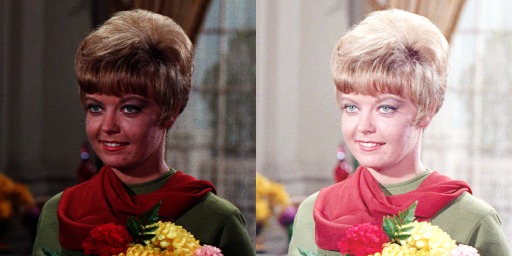

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('----------------------------------')
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------')

try:
  brightness_log = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Kuliah polinema/sem 5/PCVK/Images/female.tiff')
logarithmic_brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      logarithmic_brightness_image[y,x,c] = np.clip(brightness_log * np.log(1 + original[y,x,c]), 0, 255)

# Konstanta skala untuk transformasi logaritmik
# c = 255 / np.log1p(255)

# Transformasi logaritmik seluruh gambar tanpa loop
# logarithmic_brightness_image = c * np.log1p(original.astype(np.float32)) * brightness_log

final_frame = cv.hconcat((original, logarithmic_brightness_image))
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:



Averaging







----------------------------------
 Transformasi Grayscale: Averaging 
----------------------------------


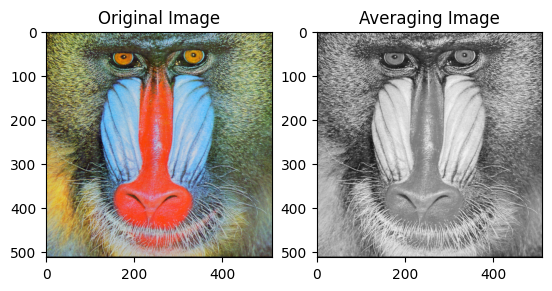

In [1]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

print('----------------------------------')
print(' Transformasi Grayscale: Averaging ')
print('----------------------------------')

# Membaca gambar asli
image = cv.imread('/content/drive/MyDrive/Kuliah polinema/sem 5/PCVK/Images/mandrill.tiff')

# Konversi gambar ke RGB untuk ditampilkan dengan matplotlib
original = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Mengambil dimensi gambar
height, width, channels = image.shape

# Membuat array kosong untuk gambar grayscale
grayscale_image = np.zeros((height, width), image.dtype)

for i in range(height):
  for j in range(width):
      # Mengambil nilai B, G, R untuk piksel
      R = int(image[i, j, 0])
      G = int(image[i, j, 1])
      B = int(image[i, j, 2])
      # Menghitung rata-rata
      gray_value = int((B + G + R) / 3)
      # Menyimpan nilai grayscale ke gambar grayscale
      grayscale_image[i, j] = gray_value

# Gambar Original
plt.subplot(1, 2, 1) # Membuat subplot 1 dari grid 1 baris, 2 kolom (subplot di sebelah kiri)
plt.title("Original Image")
plt.imshow(original)

# Gambar Averaging
plt.subplot(1, 2, 2)
plt.title("Averaging Image")
plt.imshow(grayscale_image, cmap="gray") # Menentukan cmap='gray' untuk menampilkan gambar grayscale
plt.show()

Lightness

----------------------------------
 Transformasi Grayscale: Lightness 
----------------------------------


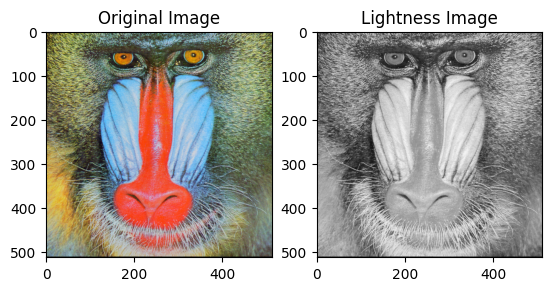

In [3]:
print('----------------------------------')
print(' Transformasi Grayscale: Lightness ')
print('----------------------------------')

# Membuat array kosong untuk gambar grayscale
lightness_image = np.zeros((height, width), image.dtype)

for y in range(height):
  for x in range(width):
      # Mengambil nilai B, G, R untuk piksel
      R = int(image[y, x, 0])
      G = int(image[y, x, 1])
      B = int(image[y, x, 2])
      # Menghitung rata-rata
      gray = int(((np.max([R, G, B]) + np.min([R, G, B])) / 2))
      lightness_image[y, x] = gray

# Gambar Original
plt.subplot(1, 2, 1) # Membuat subplot 1 dari grid 1 baris, 2 kolom (subplot di sebelah kiri)
plt.title("Original Image")
plt.imshow(original)

# Gambar Averaging
plt.subplot(1, 2, 2)
plt.title("Lightness Image")
plt.imshow(lightness_image, cmap="gray") # Menentukan cmap='gray' untuk menampilkan gambar grayscale
plt.show()

Luminance

----------------------------------
 Transformasi Grayscale: Luminance 
----------------------------------


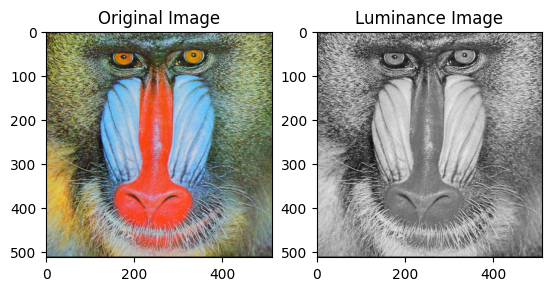

In [7]:
print('----------------------------------')
print(' Transformasi Grayscale: Luminance ')
print('----------------------------------')

# Membuat array kosong untuk gambar grayscale
luminance_image = np.zeros((height, width), image.dtype)

for y in range(height):
  for x in range(width):
      # Mengambil nilai R, G, B untuk piksel Red (indeks 2) Green (indeks 1) Blue (indeks 0). karena menggunakan opencv
      luminance_image[y, x] = np.clip(0.07 * image[y, x, 0] + 0.72 * image[y, x, 1] + 0.21 * image[y, x, 2], 0, 255)

# Gambar Original
plt.subplot(1, 2, 1) # Membuat subplot 1 dari grid 1 baris, 2 kolom (subplot di sebelah kiri)
plt.title("Original Image")
plt.imshow(original)

# Gambar Averaging
plt.subplot(1, 2, 2)
plt.title("Luminance Image")
plt.imshow(luminance_image, cmap="gray") # Menentukan cmap='gray' untuk menampilkan gambar grayscale
plt.show()

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale

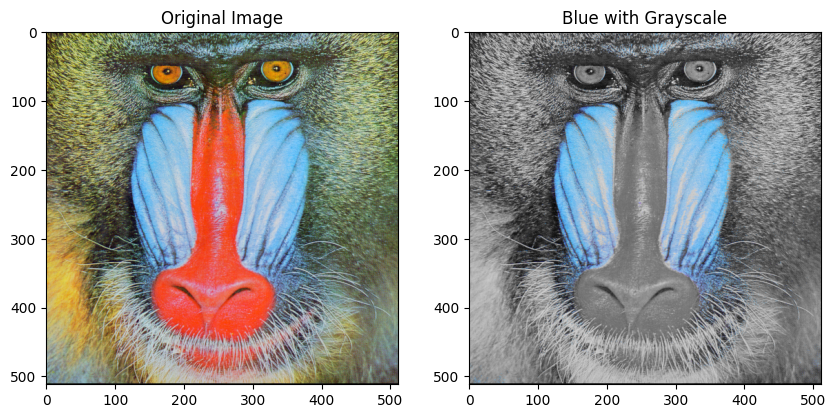

In [5]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Membaca gambar asli
img = cv.imread('/content/drive/MyDrive/Kuliah polinema/sem 5/PCVK/Images/mandrill.tiff')

# Konversi gambar ke RGB untuk ditampilkan
image_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# Convert the input image from BGR to HSV color space
image_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Membuat mask untuk warna biru
# Menentukan batasan warna biru dalam ruang warna BGR
lower_blue = np.array([100, 50, 50])  # Batas bawah untuk biru
upper_blue = np.array([140, 255, 255])  # Batas atas untuk biru

# Membuat mask berdasarkan batasan warna
blue_mask = cv.inRange(image_hsv, lower_blue, upper_blue)

# Membuat citra hasil dengan warna biru
# Initialize an empty array for the blue mask image
blue_img = np.copy(img)

# Iterate over each pixel in the image
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        if blue_mask[y, x] == 0:
            # Ubah non-blue areas menjadi grayscale menggunakan luminance method
            gray = int(0.299 * img[y, x, 2] + 0.587 * img[y, x, 1] + 0.114 * img[y, x, 0])
            blue_img[y, x] = [gray, gray, gray]

# Menampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)

plt.subplot(1, 2, 2)
plt.title("Blue with Grayscale")
plt.imshow(cv.cvtColor(blue_img, cv.COLOR_BGR2RGB)) # Saya menambahkan konversi gambar hasil akhir (blue_img) ke RGB sebelum menampilkannya dengan plt.imshow. Ini memastikan bahwa warna ditampilkan dengan benar di matplotlib. (copilot better)
plt.show()
